In [8]:
import pandas as pd

data = pd.read_csv('Salary_dataset.csv')
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [10]:
data = data.drop(columns='Unnamed: 0')
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['years_normalized'] = scaler.fit_transform(data['YearsExperience'].values.reshape(-1, 1))
data['salary_normalized'] = scaler.fit_transform(data['Salary'].values.reshape(-1, 1))

data

,YearsExperience,Salary,years_normalized,salary_normalized
0,1.2,39344.0,0.000000,0.019041
1,1.4,46206.0,0.021277,0.100094
2,1.6,37732.0,0.042553,0.000000
3,2.1,43526.0,0.095745,0.068438
4,2.3,39892.0,0.117021,0.025514
5,3.0,56643.0,0.191489,0.223376
6,3.1,60151.0,0.202128,0.264812
7,3.3,54446.0,0.223404,0.197425
8,3.3,64446.0,0.223404,0.315545
9,3.8,57190.0,0.276596,0.229837


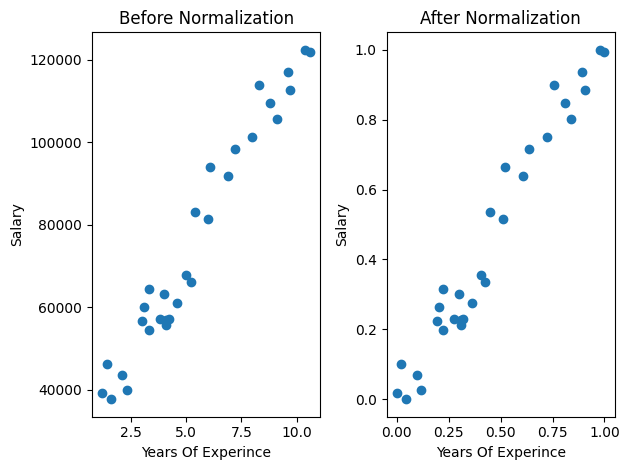

In [22]:
import matplotlib.pyplot as plt

# Grafik Sebelum Normalisasi
plt.subplot(1, 2, 1)
plt.scatter(data['YearsExperience'], data['Salary'])
plt.xlabel("Years Of Experince")
plt.ylabel('Salary')
plt.title("Before Normalization")

# Grafik After Normalization
plt.subplot(1, 2, 2)
plt.scatter(x = data['years_normalized'], y = data['salary_normalized'])
plt.xlabel("Years Of Experince")
plt.ylabel('Salary')
plt.title('After Normalization')

plt.tight_layout()
plt.show()

In [23]:
X = pd.DataFrame(data['YearsExperience'])
y = pd.DataFrame(data['Salary'])

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [26]:
print(f"X train shape: {X_train.shape}")
print(f"X tes shape: {X_test.shape}")
print(f"y train shape: {y_train.shape}")
print(f"y test shape: {y_test.shape}")

X train shape: (24, 1)
X tes shape: (6, 1)
y train shape: (24, 1)
y test shape: (6, 1)


In [27]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [28]:
print(regressor.intercept_)

[24677.60352456]


In [29]:
print(regressor.coef_)

[[9332.94473799]]


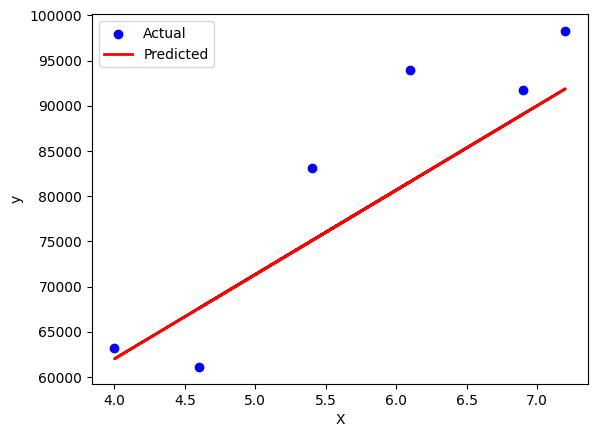

In [31]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, regressor.predict(X_test), color = 'red', linewidth = '2', label = 'Predicted')
plt.xlabel('X')
plt.ylabel("y")
plt.legend()
plt.show()

In [33]:
y_pred = regressor.predict(X_test)

array([[75075.50510972],
       [91874.8056381 ],
       [62009.38247653],
       [81608.56642631],
       [67609.14931932],
       [89074.92221671]])

In [35]:
y_pred

array([[75075.50510972],
       [91874.8056381 ],
       [62009.38247653],
       [81608.56642631],
       [67609.14931932],
       [89074.92221671]])

In [34]:
y_test

,Salary
17,83089.0
21,98274.0
10,63219.0
19,93941.0
14,61112.0
20,91739.0


In [38]:
from sklearn import metrics
import numpy as np

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 51338023.49224833
Mean Absolute Error: 6185.994575326626
Root Mean Squared Error: 7165.0557215033805


**Kesimpulan:**

Dalam evaluasi model, ditemukan hasil berikut:

1. Mean Squared Error (MSE): 51338023.49224833. Nilai MSE yang tinggi menunjukkan tingkat kesalahan yang signifikan dalam prediksi model.

2. Mean Absolute Error (MAE): 6185.994575326626. Nilai MAE menunjukkan besarnya kesalahan prediksi secara absolut.

3. Root Mean Squared Error (RMSE): 7165.0557215033805. Nilai RMSE adalah akar kuadrat dari MSE dan memberikan gambaran kesalahan prediksi secara keseluruhan.

Dalam konteks data yang terbatas dengan hanya 30 baris, hasil evaluasi mungkin terpengaruh. Jumlah sampel yang sedikit dapat menghasilkan hasil evaluasi yang tidak akurat dan estimasi koefisien regresi yang tidak dapat diandalkan.

Sebagai rekomendasi, diperlukan lebih banyak data untuk meningkatkan kinerja dan kepercayaan pada model. Dengan demikian, perlu dilakukan evaluasi lebih lanjut atau pertimbangan penggunaan model alternatif atau fitur tambahan guna meningkatkan performa prediksi.